In [57]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
df["customerID"].duplicated().sum()

np.int64(0)

In [65]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [66]:
def conv(value): 
    if value == 1: 
        return "yes"
    else:
        return "no" 
        df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


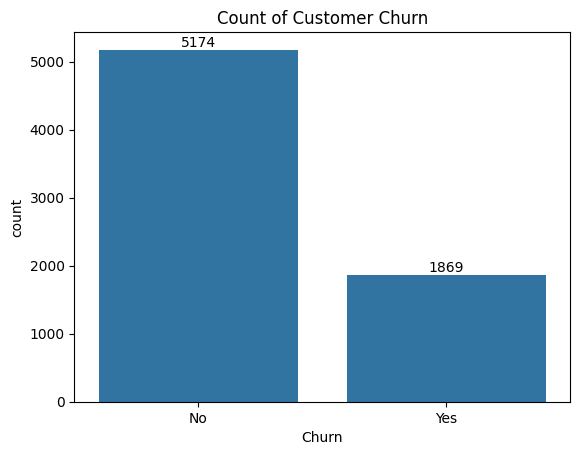

In [74]:
plt.title("Count of Customer Churn")
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.show()


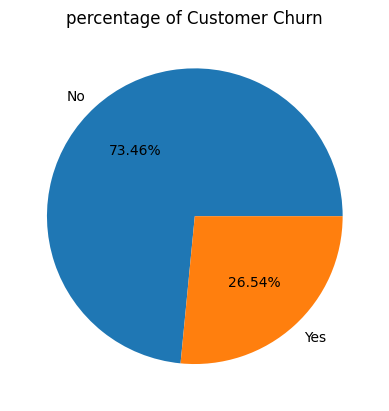

In [75]:
plt.title("percentage of Customer Churn")
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

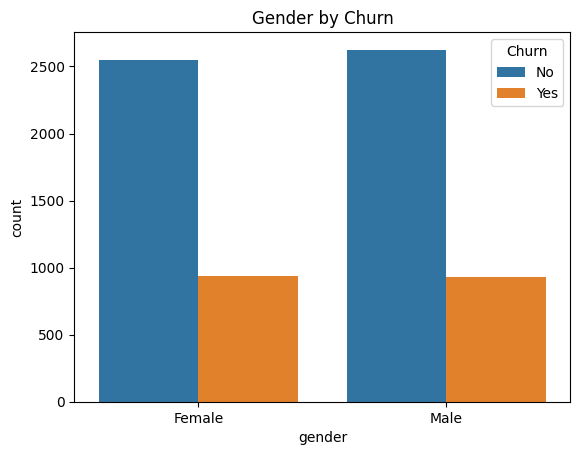

In [77]:
plt.title("Gender by Churn")
sns.countplot(x= "gender", data = df, hue = "Churn")
plt.show()

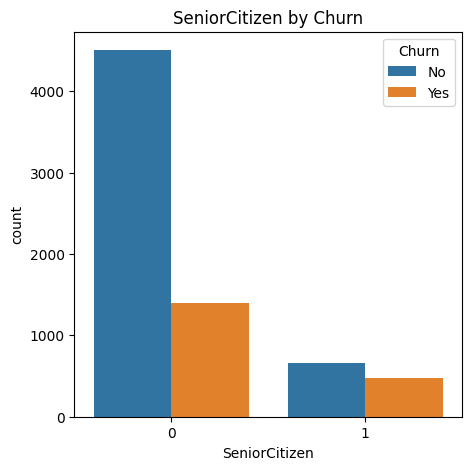

In [87]:
plt.figure(figsize = (5,5))
plt.title("SeniorCitizen by Churn")
sns.countplot(x= "SeniorCitizen", data = df, hue = "Churn")
plt.show()

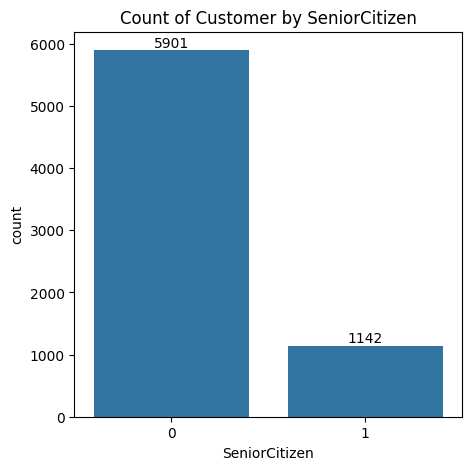

In [95]:
plt.figure(figsize = (5,5))
plt.title("Count of Customer by SeniorCitizen")
ax = sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.show()

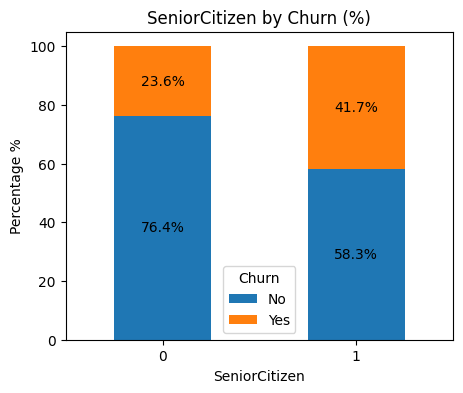

In [159]:
# Create crosstab (counts)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to % (row-wise)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ct_pct.plot(kind='bar', stacked=True, figsize=(5,4))

plt.title("SeniorCitizen by Churn (%)")
plt.ylabel("Percentage %")
plt.legend(title="Churn")
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, row in ct_pct.iterrows():
    cum = 0
    for churn_value in ct_pct.columns:
        val = row[churn_value]
        plt.text(
            i,                 # x
            cum + val/2,       # y  (middle of each segment)
            f"{val:.1f}%",     # label
            ha='center', va='center'
        )
        cum += val

plt.show()

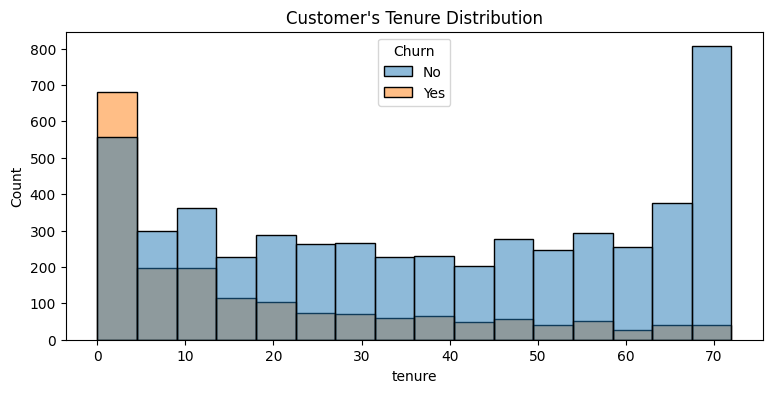

In [112]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data=df , hue = "Churn")
plt.title("Customer's Tenure Distribution")
plt.show()


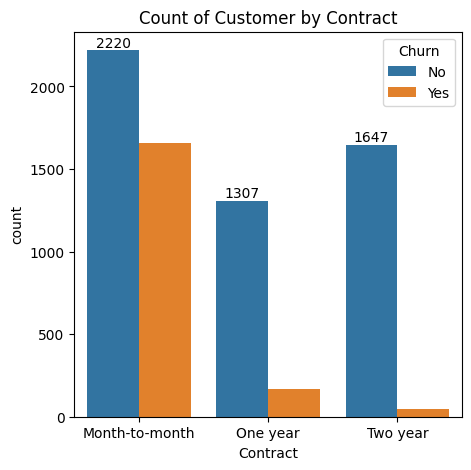

In [116]:
plt.figure(figsize = (5,5))
plt.title("Count of Customer by Contract")
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

In [118]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

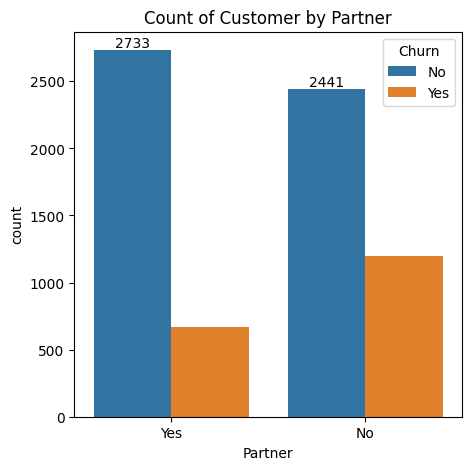

In [151]:
plt.figure(figsize = (5,5))
plt.title("Count of Customer by Partner")
ax = sns.countplot(x = "Partner", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

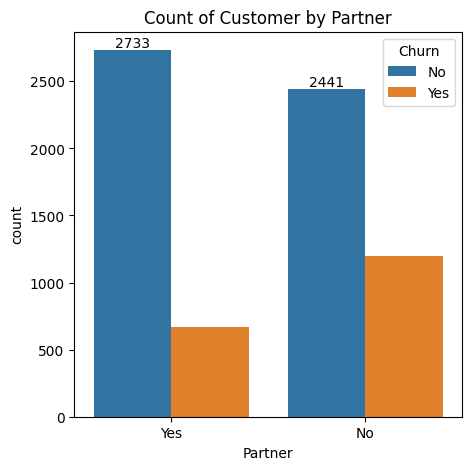

In [153]:
plt.figure(figsize = (5,5))
plt.title("Count of Customer by Partner")
ax = sns.countplot(x = "Partner", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

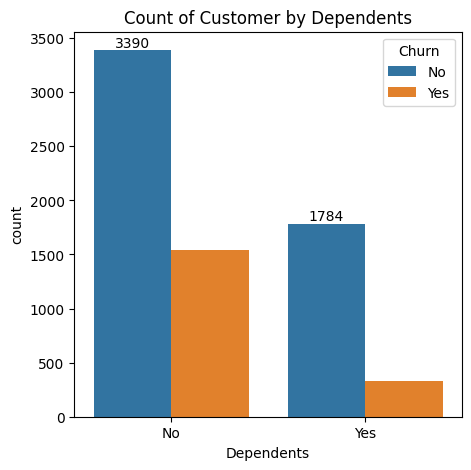

In [152]:
plt.figure(figsize = (5,5))
plt.title("Count of Customer by Dependents")
ax = sns.countplot(x = "Dependents", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

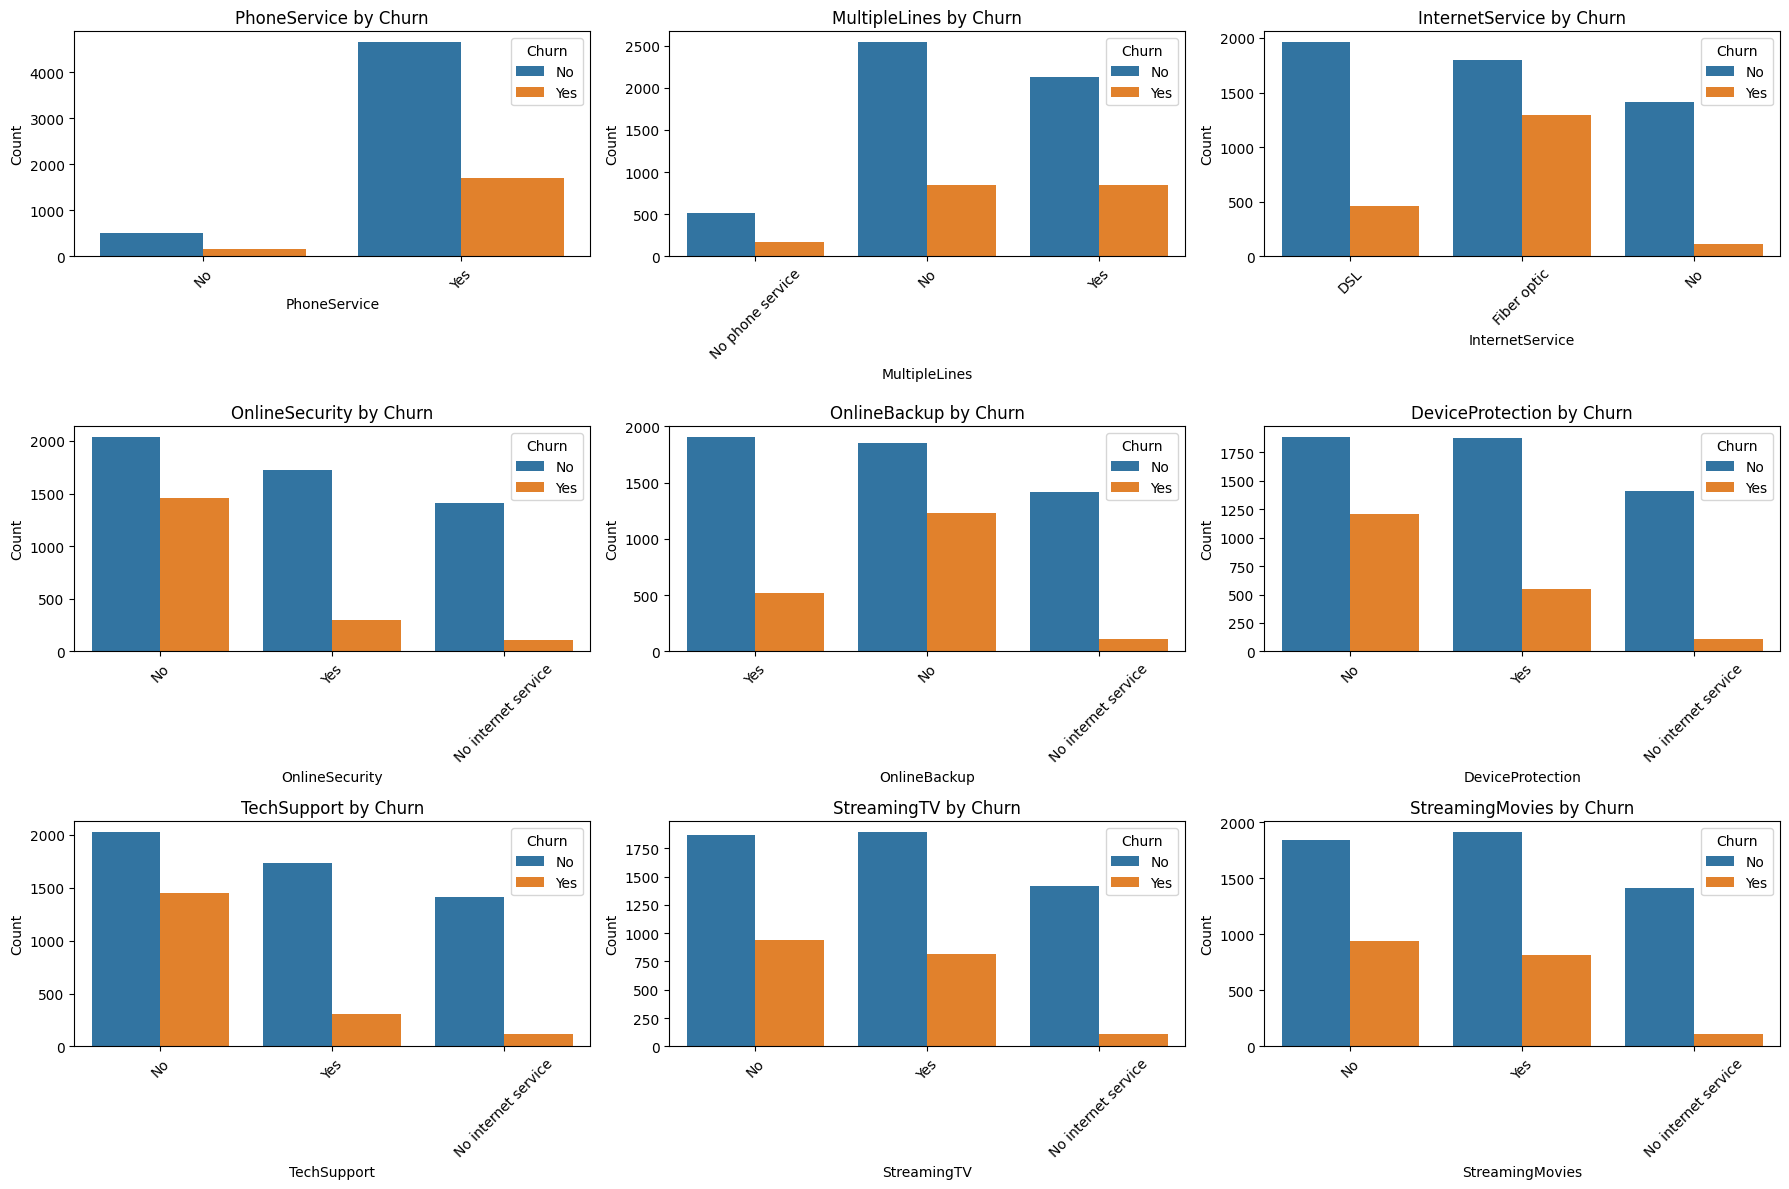

In [158]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid (3 rows × 3 columns)
plt.figure(figsize=(18, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f"{col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

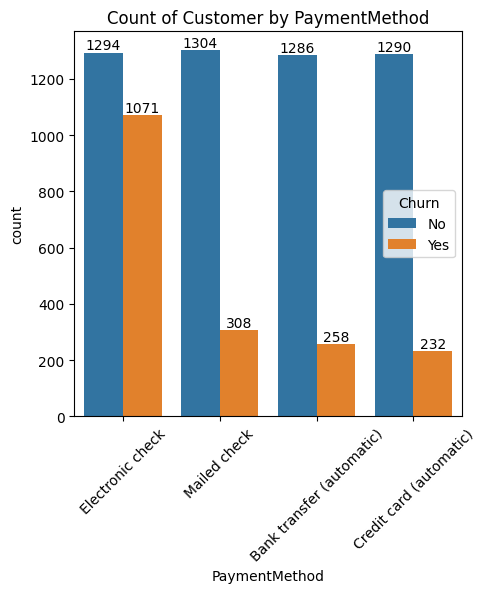

In [157]:
plt.figure(figsize = (5,5))
plt.title("Count of Customer by PaymentMethod")
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.show()

<Axes: >

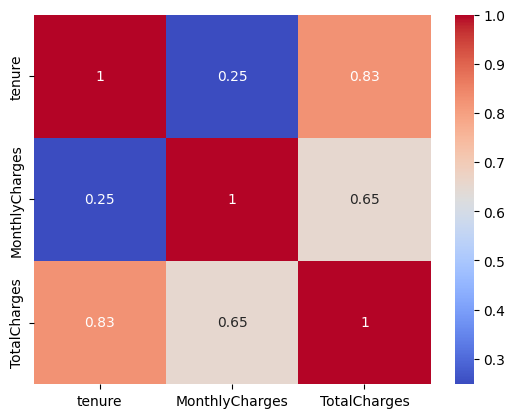

In [129]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='tenure', ylabel='Count'>

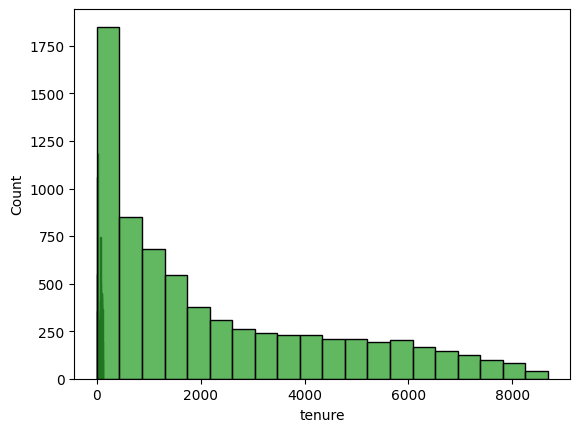

In [135]:
sns.histplot(df['tenure'], bins=20 )
sns.histplot(df['MonthlyCharges'], bins=20)
sns.histplot(df['TotalCharges'], bins=20)


<Axes: xlabel='tenure_bin', ylabel='count'>

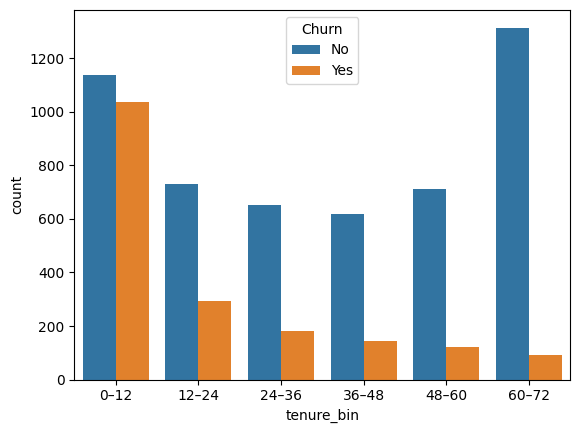

In [139]:
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72],
                          labels=['0–12','12–24','24–36','36–48','48–60','60–72'])

sns.countplot(x='tenure_bin', data=df, hue='Churn')


<Axes: xlabel='Churn', ylabel='tenure'>

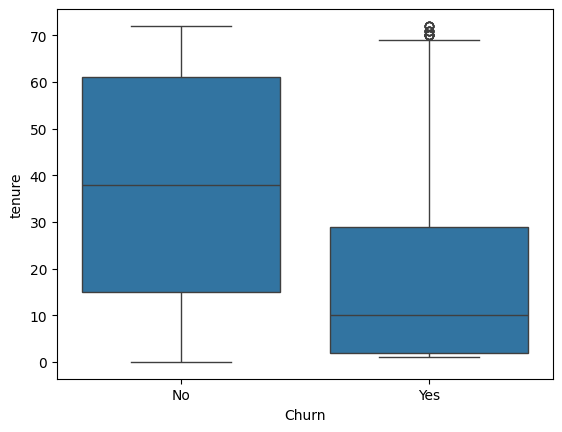

In [142]:
sns.boxplot(x='Churn', y='tenure', data=df)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

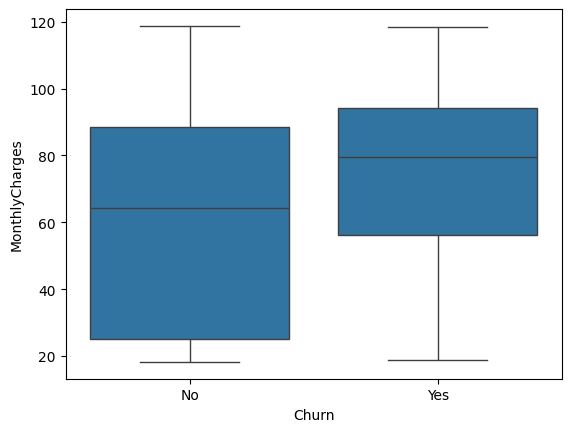

In [143]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


<Axes: xlabel='Churn', ylabel='TotalCharges'>

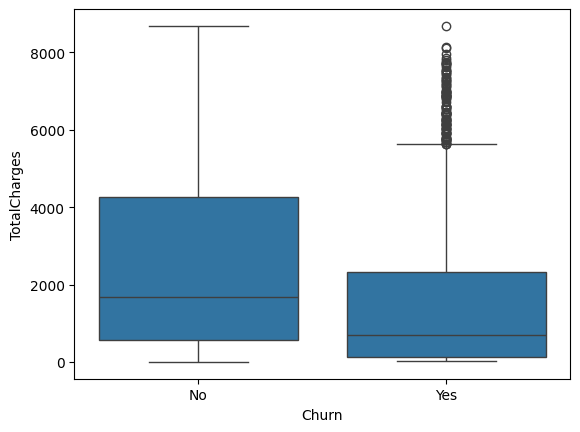

In [144]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
